# Explore the Cryptocurrencies Market 

In [1]:
# Importing pandas
import pandas as pd

# Importing matplotlib and setting aesthetics for plotting later.
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
plt.style.use('fivethirtyeight')

# Reading in current data from coinmarketcap.com
current = pd.read_json("https://api.coinmarketcap.com/v1/ticker/")

# Printing out the first few lines
current.head()

,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,3.116484e+09,17342037,bitcoin,1540532567,112035711484,2.100000e+07,Bitcoin,-0.00,-0.25,-0.20,1.000000,6460.354772,1,BTC,17342037
1,1.031667e+09,102803633,ethereum,1540532565,20805009377,NaN,Ethereum,-0.09,0.06,-0.37,0.031449,202.376208,2,ETH,102803633
2,2.513240e+08,40205513967,ripple,1540532529,18339994243,1.000000e+11,XRP,0.04,0.28,0.20,0.000071,0.456156,3,XRP,99991797922
3,2.258772e+08,17422825,bitcoin-cash,1540532557,7621164490,2.100000e+07,Bitcoin Cash,-0.24,-0.72,0.21,0.067974,437.424154,4,BCH,17422825
4,2.846849e+08,906245118,eos,1540532547,4855764029,NaN,EOS,-0.18,-0.19,0.34,0.000833,5.358113,5,EOS,1006245120


In [2]:
# Reading datasets/coinmarketcap_06122017.csv into pandas
dec6 = pd.read_csv("coinmarketcap_06122017.csv")

# Selecting the 'id' and the 'market_cap_usd' columns
market_cap_raw = dec6[['id', 'market_cap_usd']]

# Counting the number of values
market_cap_raw.count()

id                1326
market_cap_usd    1031
dtype: int64

In [3]:
# Filtering out rows without a market capitalization
cap = market_cap_raw.query('market_cap_usd > 0')

# Counting the number of values again
cap.count()

id                1031
market_cap_usd    1031
dtype: int64

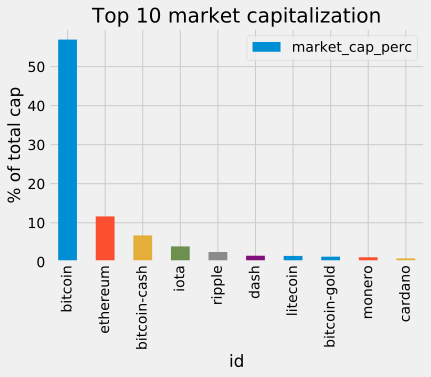

In [4]:
#Declaring these now for later use in the plots
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'

# Selecting the first 10 rows and setting the index
cap10 = cap.set_index('id') \
           .sort_values(by='market_cap_usd', ascending=False)[:10]
    
# Calculating market_cap_perc
cap10 = cap10.assign(market_cap_perc = 
            lambda x: x.market_cap_usd / cap.market_cap_usd.sum() * 100)

# Plotting the barplot with the title defined above 
ax = cap10.plot.bar(y='market_cap_perc', title=TOP_CAP_TITLE)

# Annotating the y axis with the label defined above
_ = ax.set_ylabel(TOP_CAP_YLABEL)

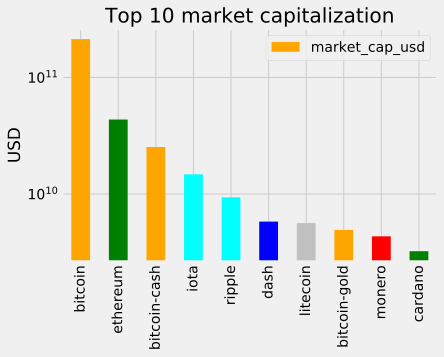

In [5]:
# Colors for the bar plot
COLORS = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']

# Plotting market_cap_usd as before but adding the colors and scaling the y-axis  
ax = cap10.plot.bar(y="market_cap_usd", logy=True, color=COLORS, title=TOP_CAP_TITLE)

# Annotating the y axis with 'USD'
_ = ax.set_ylabel('USD')

# Final touch! Removing the xlabel as it is not very informative
_ = ax.set_xlabel('')

In [6]:
# Selecting the id, percent_change_24h and percent_change_7d columns
volatility = dec6[['id', 'percent_change_24h', 'percent_change_7d']]

# Setting the index to 'id' and dropping all NaN rows
volatility = volatility.set_index('id').dropna()

# Sorting the DataFrame by percent_change_24h in ascending order
volatility = volatility.sort_values(by='percent_change_24h', ascending=True)

# Checking the first few rows
volatility.head()

,percent_change_24h,percent_change_7d
id,,
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
coupecoin,-93.93,-61.24
tyrocoin,-79.02,-87.43
petrodollar,-76.55,542.96


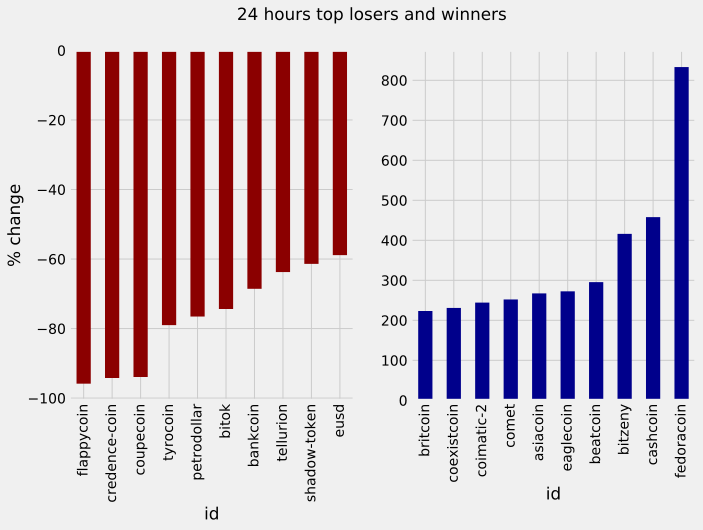

In [7]:
#Defining a function with 2 parameters, the series to plot and the title
def top10_subplot(volatility_series, title):
    # Making the subplot and the figure for two side by side plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
    
    # Plotting with pandas the barchart for the top 10 losers
    ax = volatility_series[:10].plot.bar(color='darkred', ax=axes[0])
    
    # Setting the figure's main title to the text passed as parameter
    fig.suptitle(title)
    
    # Setting the ylabel to '% change'
    ax.set_ylabel('% change')
    
    # Same as above, but for the top 10 winners
    ax = volatility_series[-10:].plot.bar(color='darkblue', ax=axes[1])
    
    # Returning this for good practice, might use later
    return fig, ax

DTITLE = "24 hours top losers and winners"

# Calling the function above with the 24 hours period series and title DTITLE  
fig, ax = top10_subplot(volatility.percent_change_24h, DTITLE)

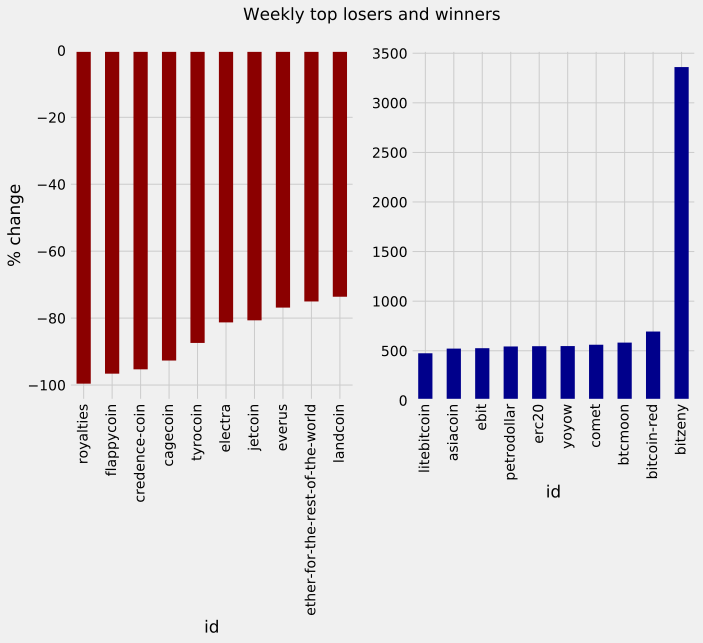

In [8]:
# Sorting in ascending order
volatility7d = volatility.sort_values(by='percent_change_7d', ascending=True)

WTITLE = "Weekly top losers and winners"

# Calling the top10_subplot function
fig, ax = top10_subplot(volatility7d.percent_change_7d, WTITLE)

In [9]:
# Selecting everything bigger than 10 billion 
largecaps = cap.query('market_cap_usd > 10000000000')

# Printing out largecaps
print(largecaps)

             id  market_cap_usd
0       bitcoin    2.130493e+11
1      ethereum    4.352945e+10
2  bitcoin-cash    2.529585e+10
3          iota    1.475225e+10


<Container object of 3 artists>

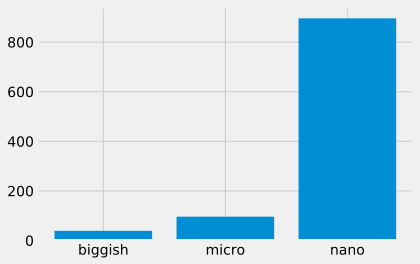

In [10]:
# Making a nice function for counting different marketcaps from the
# "cap" DataFrame. Returns an int.
# INSTRUCTORS NOTE: Since you made it to the end, consider it a gift :D
def capcount(query_string):
    return cap.query(query_string).count().id

# Labels for the plot
LABELS = ["biggish", "micro", "nano"]

# Using capcount count the biggish cryptos
biggish = capcount('market_cap_usd >= 300000000')

# Same as above for micro ...
micro = capcount('market_cap_usd >= 50000000 & market_cap_usd < 300000000')

# ... and for nano
nano =  capcount('market_cap_usd < 50000000')

# Making a list with the 3 counts
values = [biggish, micro, nano]

# Plotting them with matplotlib 
plt.bar(range(len(values)), values, tick_label=LABELS)